In [304]:
! apt update
! apt install chromium-chromedriver
!pip install selenium


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
50 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
c

In [305]:
from PIL import Image
from io import BytesIO
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import re


# #Create chrome options

# options = webdriver.ChromeOptions()
# options.add_argument("--headless")
# options.add_argument("--no-sandbox")
# options.add_argument("--diable-dev-shm-usage")

# #Open chrome

# driver = webdriver.Chrome(options=options)
# driver.get("https://www.airbnb.com.co/")

In [ ]:
# png = driver.get_screenshot_as_png()
# im = Image.open(BytesIO(png))
# im.save("prueba.png")

In [307]:
#Create chrome options

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--diable-dev-shm-usage")

#Open chrome

driver = webdriver.Chrome(options=options)
driver.get("https://www.airbnb.com.co/")

# Looking for a place

searchPlace = driver.find_element(By.XPATH, '//input[@data-testid="structured-search-input-field-query"]')
#searchPlace.send_keys("Envigado")
#searchPlace.send_keys("Antioquia")
ciudades = ["Medellín", "Envigado", "Sabaneta", "Itagüí"]
searchPlace.send_keys(", ".join(ciudades))

# check-in dates

searchDateIn = driver.find_element(By.XPATH, '//div[@data-testid="structured-search-input-field-split-dates-0"]')
searchDateIn.click()
searchIn = driver.find_element(By.XPATH, '//div[@data-testid="calendar-day-16/05/2024"]')
searchIn.click()

# check-out dates

searchDateOut = driver.find_element(By.XPATH, '//div[@data-testid="structured-search-input-field-split-dates-1"]')
searchDateOut.click()
searchOut = driver.find_element(By.XPATH, '//div[@data-testid="calendar-day-26/05/2024"]')
searchOut.click()

# # who

guests = driver.find_element(By.XPATH, '//div[@data-testid="structured-search-input-field-guests-button"]')
guests.click()

increase = driver.find_element(By.XPATH, '//button[@data-testid="stepper-adults-increase-button"]')
increase.click()

# Looking for data

searchButton = driver.find_element(By.XPATH, '//button[@data-testid="structured-search-input-search-button"]')
searchButton.click()

In [ ]:
# png_search = driver.get_screenshot_as_png()
# im = Image.open(BytesIO(png_search))
# im.save("prueba_search.png")

In [308]:
def buscarItem(metodo=By.XPATH, ruta = "ruta"):
  lista = []
  item = driver.find_elements(By.XPATH, ruta)
  for items in item:
    elemento = items.text
    lista.append(elemento)
  return lista

In [309]:
ubicaciones = []
price = []
rating = []
ubicacion = []
#num_habitaciones = []
califcaciones = []

def obtenerDatos():
    ubicacion = buscarItem(By.XPATH, '//div[@data-testid="listing-card-title"]')
    price_pagina = buscarItem(By.XPATH, '//div[@data-testid="price-availability-row"]')
    #rating_pagina = buscarItem(By.XPATH, '//span[@class="r4a59j5 atm_h_1h6ojuz atm_9s_1txwivl atm_7l_jt7fhx atm_84_evh4rp dir dir-ltr"]')
    #ubicacion_pagina = buscarItem(By.XPATH, '//div[contains(@class, "fb4nyux atm_da_cbdd7d s1cjsi4j")]')
    #num_habitaciones_pagina = buscarItem(By.XPATH, '//li[contains(@class, "l7n4lsf atm_9s_1o8liyq_keqd55") and contains(., "habitación")]')
    calificacionPagina = buscarItem(By.XPATH, '//span[contains(@class, "r4a59j5 atm_h_1h6ojuz atm_9s_1txwivl atm_7l_jt7fhx atm_84_evh4rp dir dir-ltr")]//span[contains(@class, "ru0q88m atm_cp_1ts48j8 dir dir-ltr")]')

    ubicaciones.extend(ubicacion)
    price.extend(price_pagina)
    #rating.extend(rating_pagina)
   # ubicacion.extend(ubicacion_pagina)
    #num_habitaciones.extend(num_habitaciones_pagina)
    califcaciones.extend(calificacionPagina)

obtenerDatos()
while len(ubicaciones) < 60:
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    nextButton = soup.select_one('a[aria-label="Siguiente"]')
    if not nextButton:
        break
    nextButtonElement = driver.find_element(By.XPATH, '//a[@aria-label="Siguiente"]')
    nextButtonElement.click()
    time.sleep(5)
    obtenerDatos()

In [310]:
def extraerNumeros(cadenas):
    patron = r'\n\$([0-9,]+) COP'
    numeros = []
    for cadena in cadenas:
        coincidencias = re.findall(patron, cadena)
        if coincidencias:
            numeros.append(float(coincidencias[0].replace(',', '')))
    return numeros


In [311]:
def separarValores(lista):
    califaciones = []
    cantidadResenias = []
    for valor in lista:
        if valor == "Nuevo":
            califaciones.append(0)
            cantidadResenias.append(0)
        else:
            match = re.match(r'([\d.]+)\s*\((.*?)\)', valor)
            if match:
                califaciones.append(float(match.group(1)))
                cantidadResenias.append(int(match.group(2)))
    return califaciones, cantidadResenias


In [312]:
def extraerCiudad(lista):
    ciudades = [normalizaCiudad(ubicacion.split()[-1]) for ubicacion in lista]
    return ciudades

In [313]:
def normalizaCiudad(ciudad):
    ciudad = ciudad.lower()
    ciudad = ciudad.replace("poblado", "medellín")
    ciudad = ciudad.replace("medellin", "medellín")
    return ciudad

In [334]:
def generarLista(tamano):
    lista = []
    for i in range(tamano):
        lista.append((i % 4) + 1)
    return lista

In [314]:
precio = extraerNumeros(price)
listaCalificacion, listaResenias = separarValores(califcaciones)
ciudades = extraerCiudad(ubicaciones)

In [315]:
def limpiar(titulos_anuncio, precio, calificaciones, resenias):
    nuevosTitulos = []
    nuevosPrecios = []
    nuevasCalificaciones = []
    nuevasResenias = []

    min_len = min(len(titulos_anuncio), len(precio), len(calificaciones), len(resenias))

    for i in range(min_len):
        if precio[i] != 0 and calificaciones[i] != 0 and resenias[i] != 0:
            nuevosTitulos.append(titulos_anuncio[i])
            nuevosPrecios.append(precio[i])
            nuevasCalificaciones.append(calificaciones[i])
            nuevasResenias.append(resenias[i])

    return nuevosTitulos, nuevosPrecios, nuevasCalificaciones, nuevasResenias

In [355]:
nuevos_titulos, nuevos_precios, nuevas_calificaciones, nuevas_resenias = limpiar(ciudades, precio, listaCalificacion, listaResenias)
habitaciones = generarLista(len(nuevos_titulos))
print(len(nuevos_precios))

58


In [356]:
import pandas as pd
pd = pd.DataFrame((zip(nuevos_titulos, nuevos_precios, nuevas_calificaciones, nuevas_resenias )), columns = ["ubicacion", "Price", "calificacion", "reseñas"])
df


,ubicacion,Price,calificacion,reseñas
0,medellín,213300.0,4.86,2172
1,envigado,88150.0,4.69,13
2,envigado,140847.0,4.78,32
3,envigado,101161.0,4.64,25
4,envigado,53403.0,5.00,6
5,envigado,94688.0,5.00,14
6,envigado,55188.0,4.92,60
7,envigado,114042.0,4.80,5
8,envigado,76237.0,5.00,15
9,envigado,86847.0,4.94,34


import pandas as pd

df = pd.DataFrame((zip(nuevos_titulos, nuevos_precios, nuevas_calificaciones, nuevas_resenias )), columns = ["ubicacion", "Price", "calificacion", "reseñas"])
df



<ipython-input-328-b7f11d2db399>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Price', y='ubicacion', inner='stick', palette='Dark2')


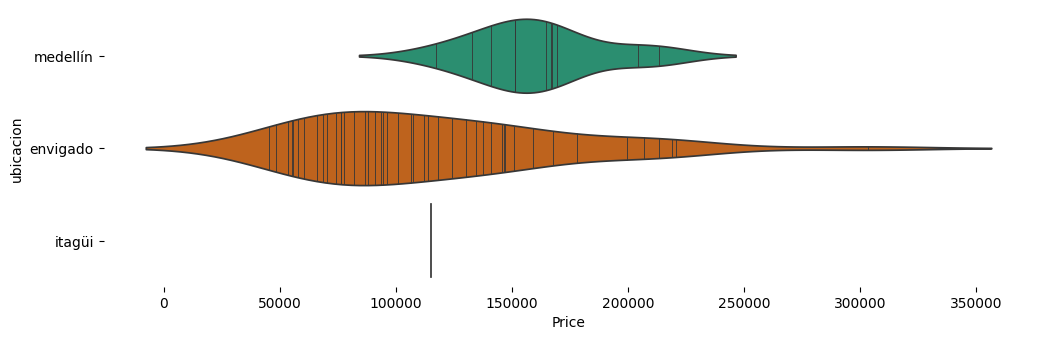

In [328]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['ubicacion'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Price', y='ubicacion', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

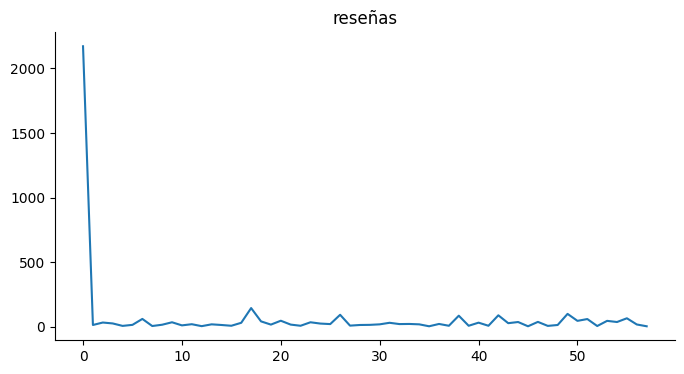

In [329]:
# @title reseñas

from matplotlib import pyplot as plt
df['reseñas'].plot(kind='line', figsize=(8, 4), title='reseñas')
plt.gca().spines[['top', 'right']].set_visible(False)

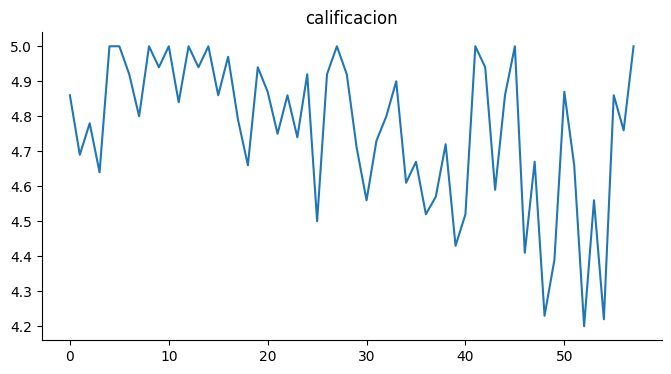

In [326]:
# @title calificacion

from matplotlib import pyplot as plt
df['calificacion'].plot(kind='line', figsize=(8, 4), title='calificacion')
plt.gca().spines[['top', 'right']].set_visible(False)

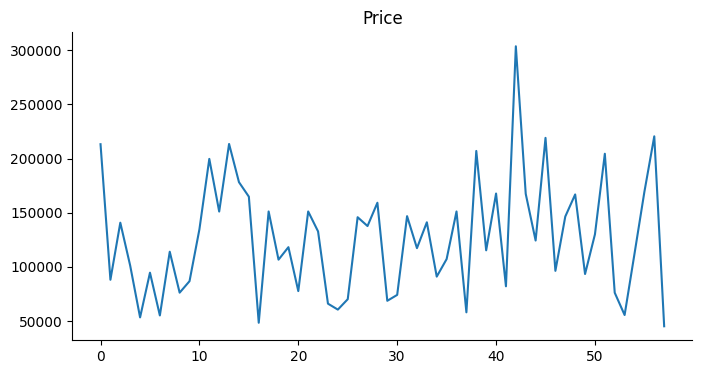

In [325]:
# @title Price

from matplotlib import pyplot as plt
df['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

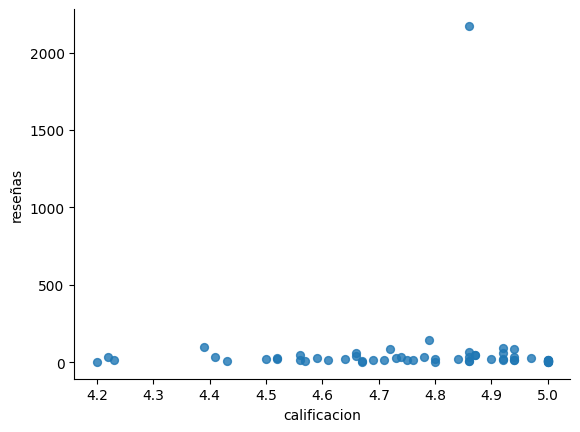

In [324]:
# @title calificacion vs reseñas

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='calificacion', y='reseñas', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

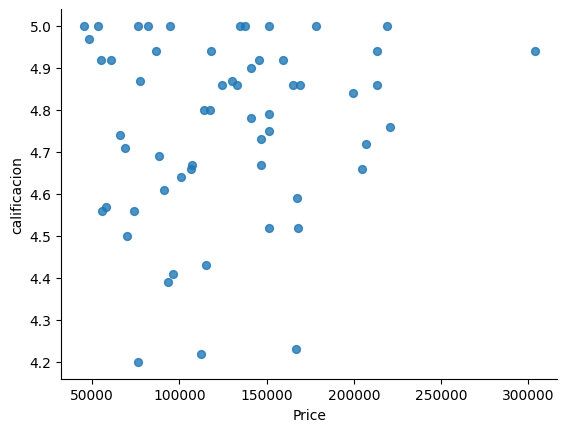

In [323]:
# @title Price vs calificacion

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Price', y='calificacion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

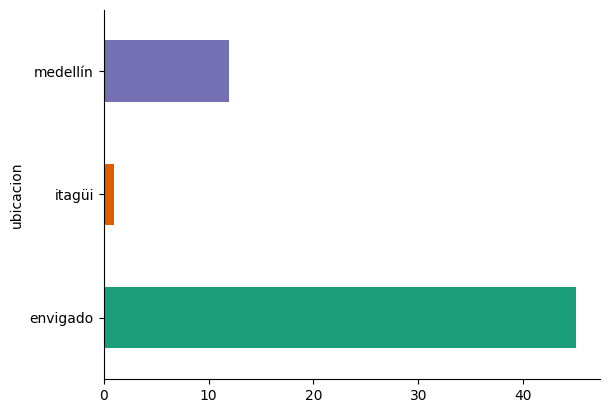

In [322]:
# @title ubicacion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ubicacion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

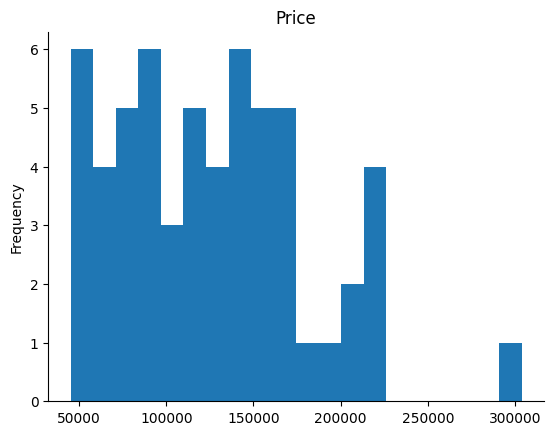

In [321]:
# @title Price

from matplotlib import pyplot as plt
df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [360]:
print(df.describe())

               Price  calificacion      reseñas
count      58.000000     58.000000    58.000000
mean   126757.051724      4.759828    65.586207
std     54145.080713      0.214496   282.808226
min     45202.000000      4.200000     3.000000
25%     83289.000000      4.645000    10.750000
50%    121309.500000      4.800000    19.500000
75%    157237.500000      4.935000    36.000000
max    303714.000000      5.000000  2172.000000


In [362]:
calificacion_por_ubicacion = df.groupby("ubicacion")["calificacion"].agg(["mean", "count"])
calificacion_por_ubicacion.columns = ["Promedio de Calificación", "Inmuebles"]
calificacion_por_ubicacion = calificacion_por_ubicacion.reset_index()
calificacion_por_ubicacion = calificacion_por_ubicacion.sort_values(by="Promedio de Calificación", ascending=False)
print(calificacion_por_ubicacion)

  ubicacion  Promedio de Calificación  Inmuebles
0  envigado                  4.776889         45
2  medellín                  4.723333         12
1    itagüi                  4.430000          1
